In [1]:
# Lodz University of Technology
# 2022-23 Image Processing Assignment 6
# @Ahmet Galip Sengun - 904261
# November 2022

import skimage
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Task 1

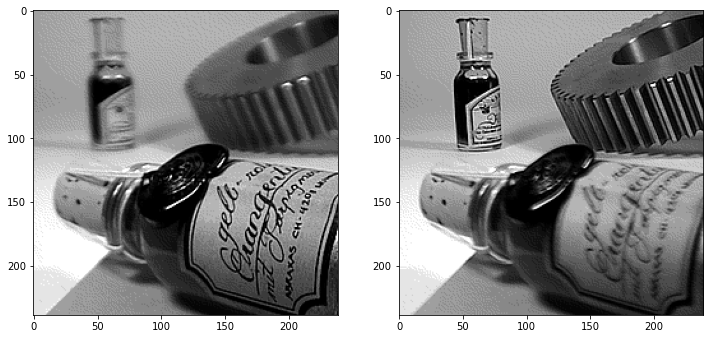

In [2]:
# Load image
left = skimage.io.imread("left.png")
right = skimage.io.imread("right.png")

fig, ax = plt.subplots(1, 2, figsize = (12,8))
ax[0].imshow(left, cmap = "gray")
ax[1].imshow(right, cmap = "gray")

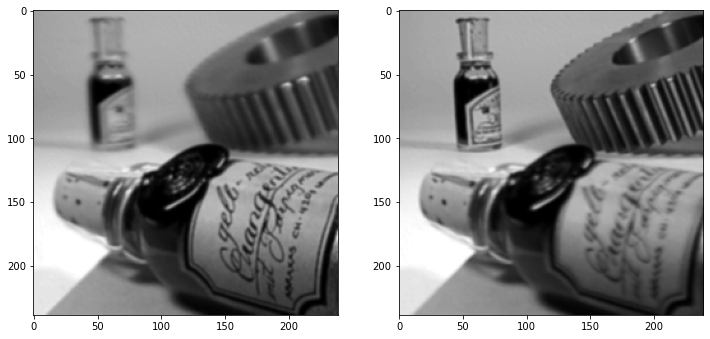

In [3]:
left_gaussian = skimage.filters.gaussian(left)
right_gaussian = skimage.filters.gaussian(right)
fig, ax = plt.subplots(1, 2, figsize = (12,8))
ax[0].imshow(left_gaussian, cmap = "gray")
ax[1].imshow(right_gaussian, cmap = "gray")

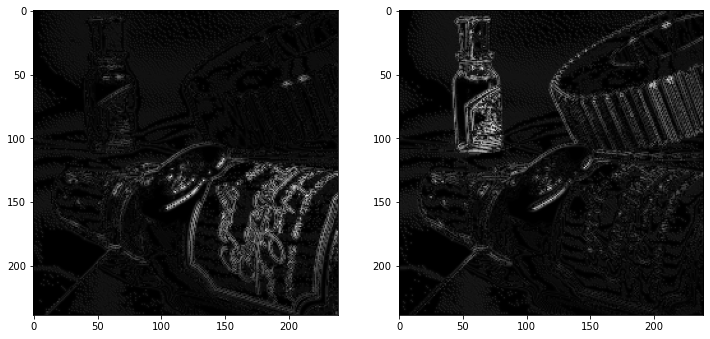

In [4]:
from skimage.util import compare_images

left_substracted = compare_images(left, left_gaussian, method = "diff")
right_substracted = compare_images(right, right_gaussian, method = "diff")

fig, ax = plt.subplots(1, 2, figsize = (12,8))
ax[0].imshow(left_substracted, cmap = "gray")
ax[1].imshow(right_substracted, cmap = "gray")

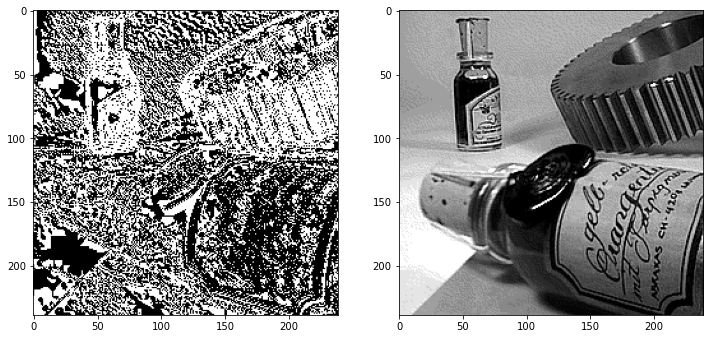

In [5]:
combined = (left_substracted < right_substracted)*1
sharpened = combined.copy()

for i in np.ndindex(combined.shape[:2]):
    sharpened[i] = left[i] if combined[i] == 0 else right[i]
            
fig, ax = plt.subplots(1, 2, figsize = (12,8))
ax[0].imshow(combined, cmap = "gray")
ax[1].imshow(sharpened, cmap = "gray")

# Task 2

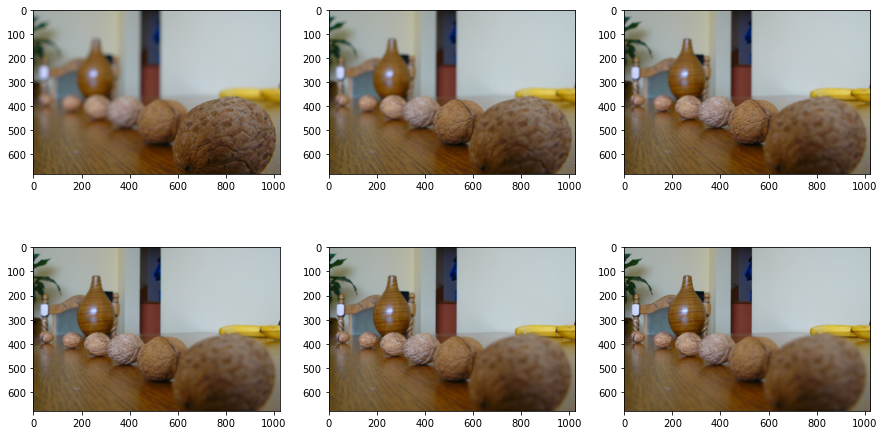

In [6]:
# Load image
one = skimage.io.imread("1.png")
two = skimage.io.imread("2.png")
three = skimage.io.imread("3.png")
four = skimage.io.imread("4.png")
five = skimage.io.imread("5.png")
six = skimage.io.imread("6.png")

fig, ax = plt.subplots(2, 3, figsize = (15,8))
ax[0, 0].imshow(one)
ax[0, 1].imshow(two)
ax[0, 2].imshow(three)
ax[1, 0].imshow(four)
ax[1, 1].imshow(five)
ax[1, 2].imshow(six)

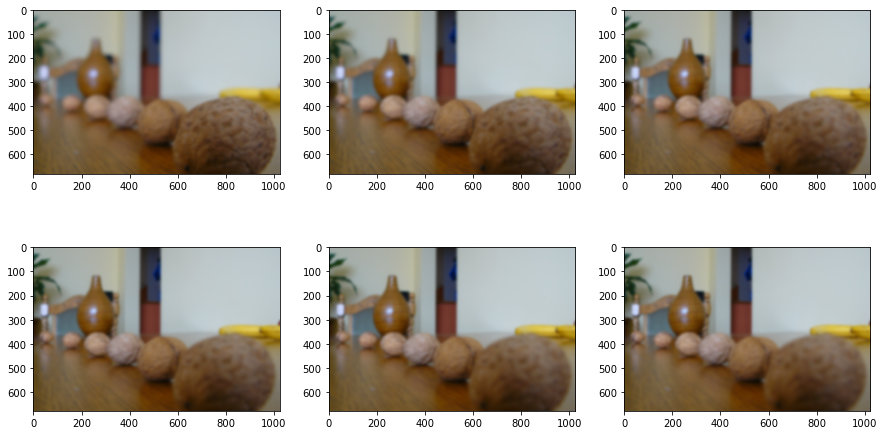

In [7]:
sigma = 5
one_g = skimage.filters.gaussian(
    one, sigma=(sigma, sigma), truncate=3.5, channel_axis=2)
two_g = skimage.filters.gaussian(
    two, sigma=(sigma, sigma), truncate=3.5, channel_axis=2)
three_g = skimage.filters.gaussian(
    three, sigma=(sigma, sigma), truncate=3.5, channel_axis=2)
four_g = skimage.filters.gaussian(
    four, sigma=(sigma, sigma), truncate=3.5, channel_axis=2)
five_g = skimage.filters.gaussian(
    five, sigma=(sigma, sigma), truncate=3.5, channel_axis=2)
six_g = skimage.filters.gaussian(
    six, sigma=(sigma, sigma), truncate=3.5, channel_axis=2)

fig, ax = plt.subplots(2, 3, figsize = (15,8))
ax[0, 0].imshow(one_g)
ax[0, 1].imshow(two_g)
ax[0, 2].imshow(three_g)
ax[1, 0].imshow(four_g)
ax[1, 1].imshow(five_g)
ax[1, 2].imshow(six_g)

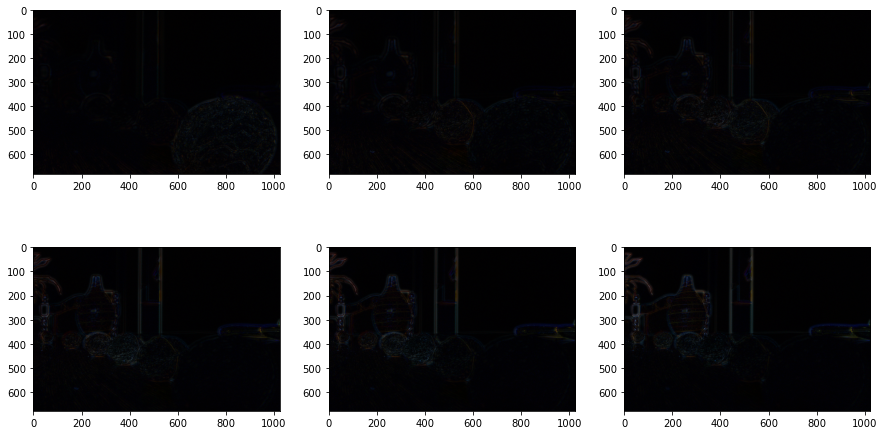

In [8]:
one_s = compare_images(one, one_g, method = "diff")
two_s= compare_images(two, two_g, method = "diff")
three_s = compare_images(three, three_g, method = "diff")
four_s = compare_images(four, four_g, method = "diff")
five_s= compare_images(five, five_g, method = "diff")
six_s = compare_images(six, six_g, method = "diff")

fig, ax = plt.subplots(2, 3, figsize = (15,8))
ax[0, 0].imshow(one_s)
ax[0, 1].imshow(two_s)
ax[0, 2].imshow(three_s)
ax[1, 0].imshow(four_s)
ax[1, 1].imshow(five_s)
ax[1, 2].imshow(six_s)

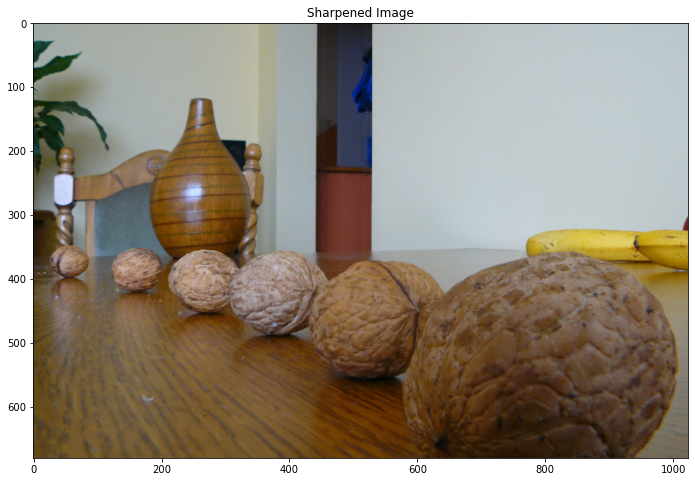

In [9]:
combined = (one_s < two_s)*1
sharpened = combined.copy()

for i in np.ndindex(combined.shape[:2]):
    l = np.array([sum(one_s[i]), sum(two_s[i]), sum(three_s[i]), 
                  sum(four_s[i]), sum(five_s[i]), sum(six_s[i])])
    index_max = np.argmax(l)
    
    if index_max == 0:
        sharpened[i] = one[i]
    if index_max == 1:
        sharpened[i] = two[i]
    if index_max == 2:
        sharpened[i] = three[i]
    if index_max == 3:
        sharpened[i] = four[i]
    if index_max == 4:
        sharpened[i] = five[i]
    if index_max == 5:
        sharpened[i] = six[i]        

plt.figure(figsize=(12,8))
plt.title("Sharpened Image")
plt.imshow(sharpened)

# Task 3

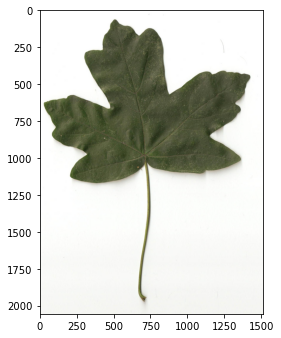

In [10]:
# Load image
leaf = skimage.io.imread("field_maple.png")
plt.figure(figsize=(4,6))
plt.imshow(leaf)

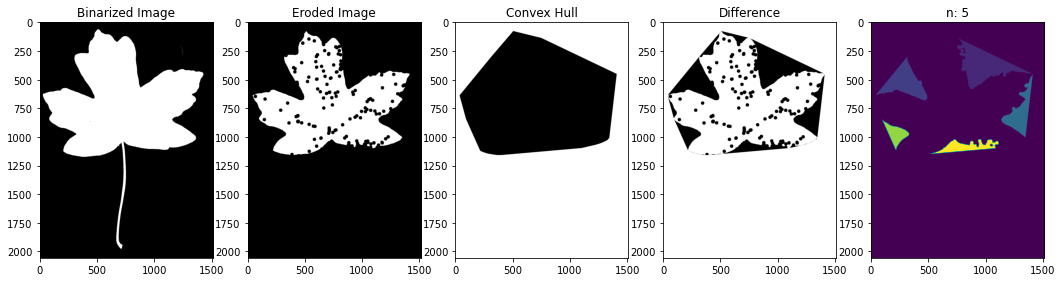

5

In [11]:
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation, disk, convex_hull_image
from skimage.util import invert
from skimage import filters, measure, morphology

def count_blunts(leaf):
    #leaf_gray = cv2.cvtColor(leaf, cv2.COLOR_BGR2GRAY)
    #otsu_thresh = threshold_otsu(leaf_gray)
    if(len(leaf.shape)<3):
          binary = leaf / 255
    elif len(leaf.shape)==3:
          binary = (leaf[:,:,2] < 180 )*1
    else:
        print("0")

    footprint = disk(15)
    eroted = erosion(binary, footprint)

    chull = convex_hull_image(eroted)
    chull = invert(chull)   
    chull=chull*1

    diff = chull + eroted

    img=measure.label(diff, background=1)
    mask = morphology.remove_small_objects(img, 10000)
    propsa = measure.regionprops(mask)
    length = len(propsa)

    fig, ax = plt.subplots(1, 5, figsize = (18,8))

    ax[0].set_title("Binarized Image")
    ax[0].imshow(binary, cmap = "gray")

    ax[1].set_title("Eroded Image")
    ax[1].imshow(eroted, cmap = "gray")

    ax[2].set_title("Convex Hull")
    ax[2].imshow(chull, cmap = "gray")

    ax[3].set_title("Difference")
    ax[3].imshow(diff, cmap = "gray")

    ax[4].set_title(f"n: {str(length)}")
    ax[4].imshow(mask)
    plt.show()
    return length
count_blunts(leaf)

# Task 4

In [12]:
import os
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = skimage.io.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [13]:
images = load_images_from_folder(r"C:\Users\ahmet\Acer_campestre")

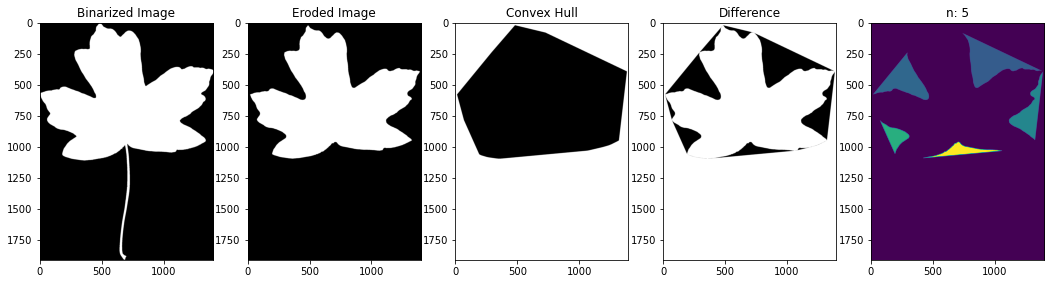

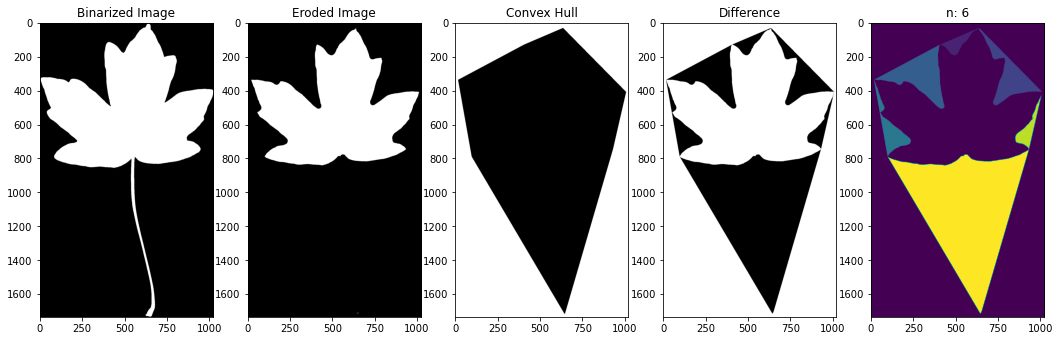

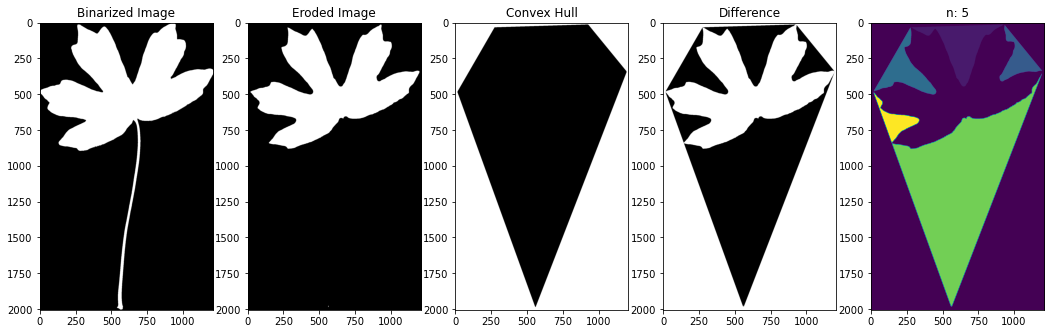

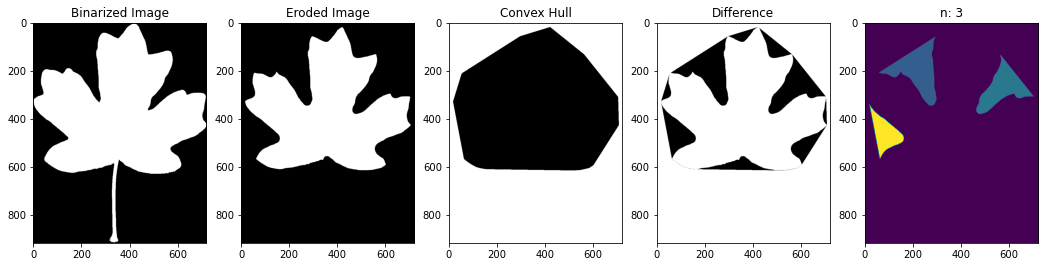

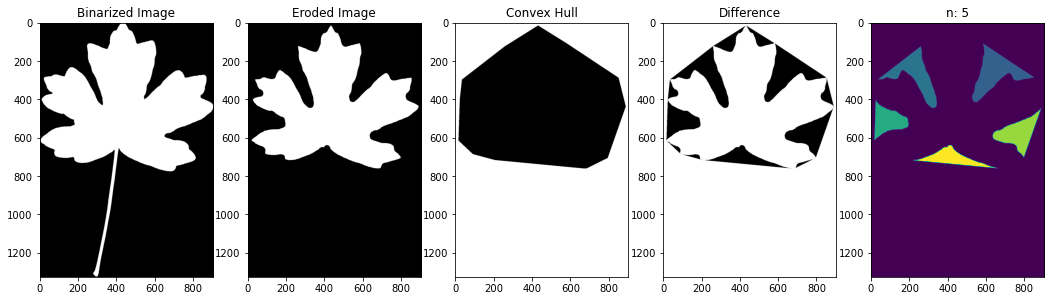

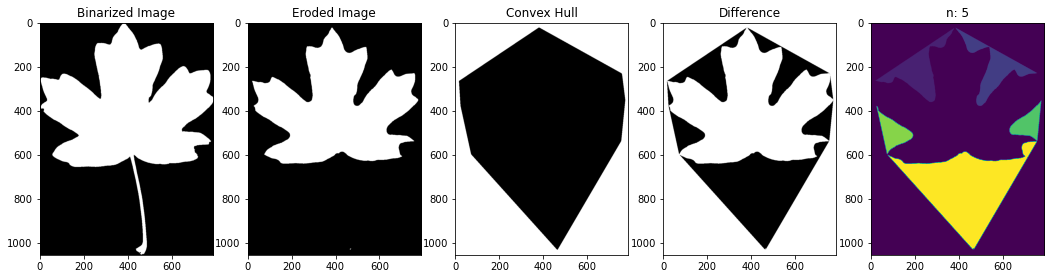

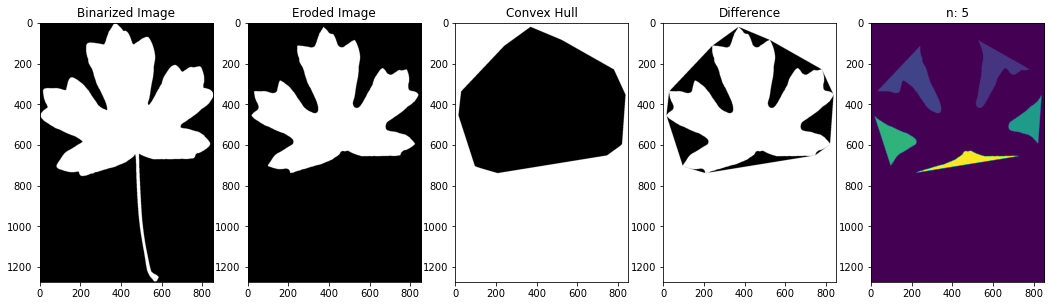

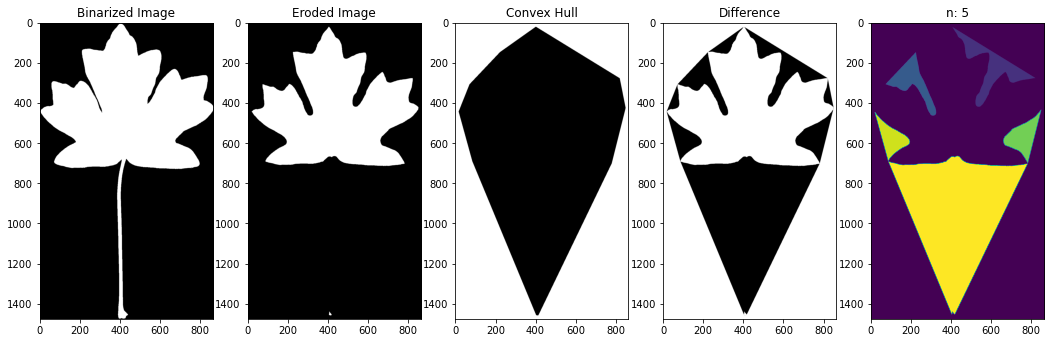

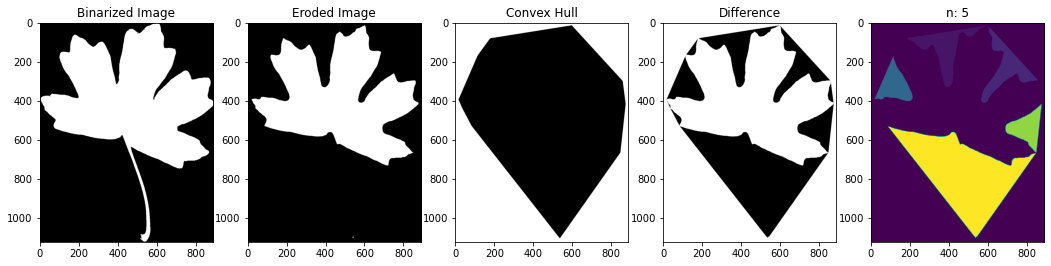

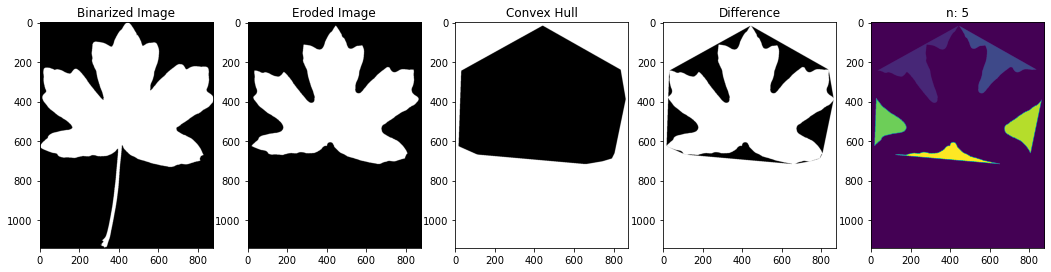

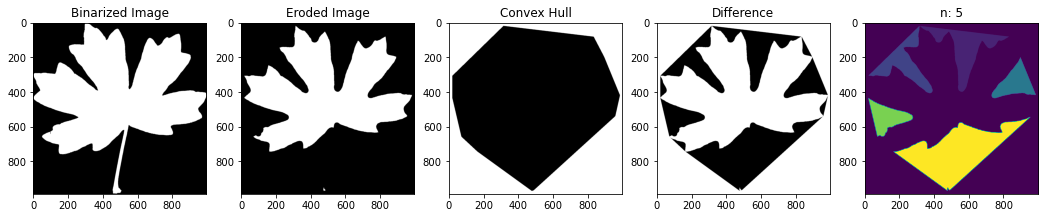

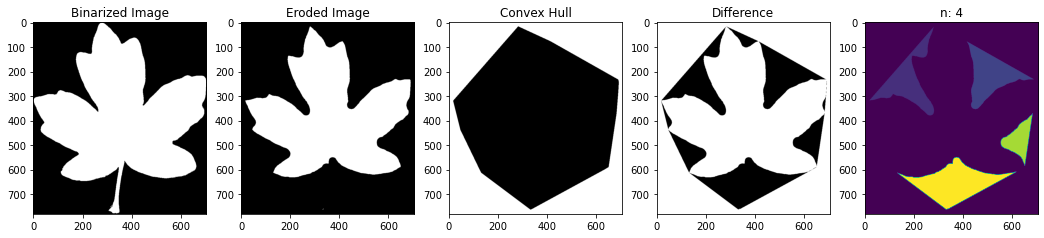

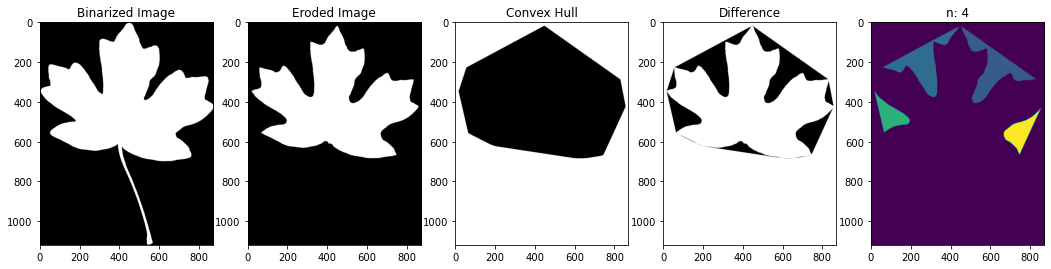

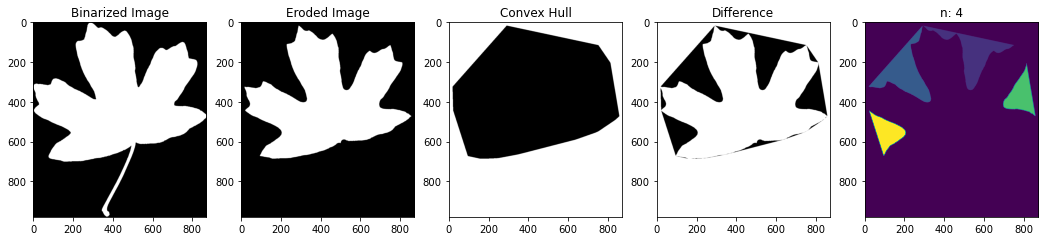

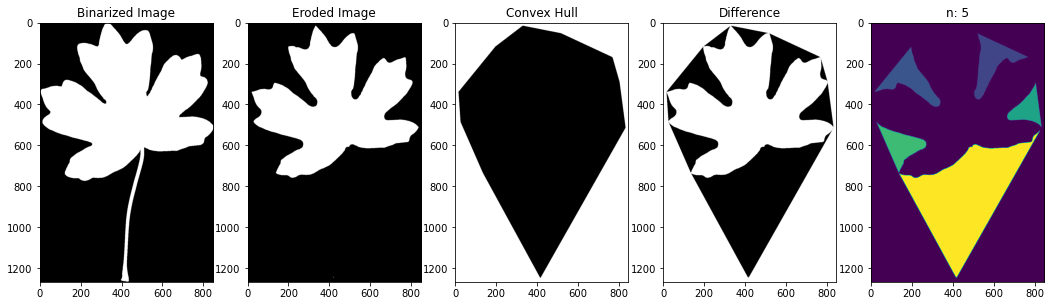

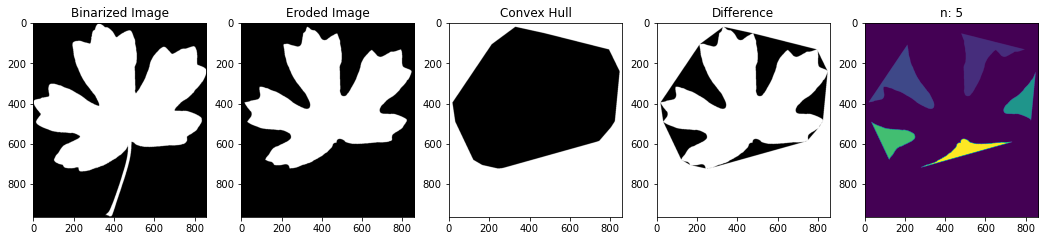

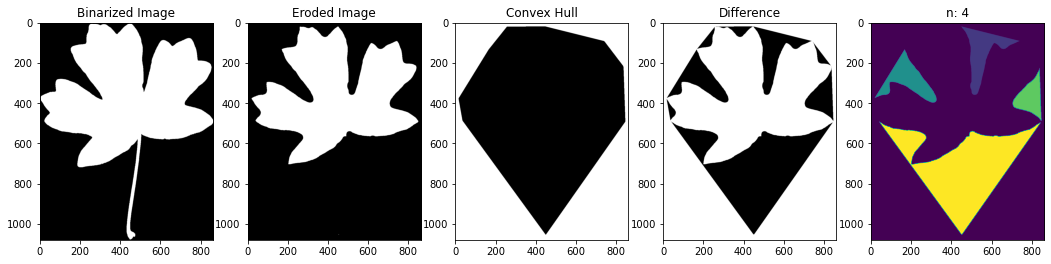

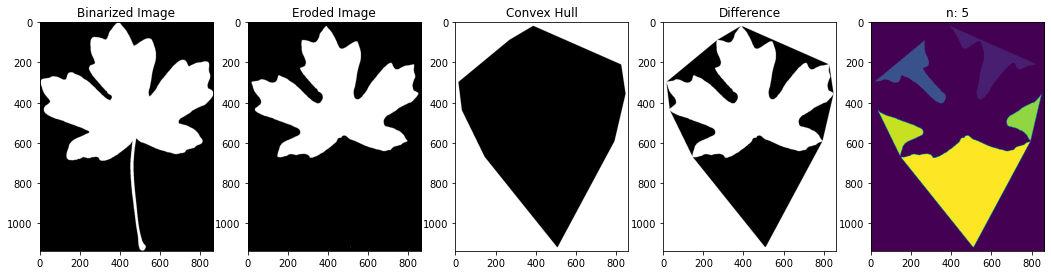

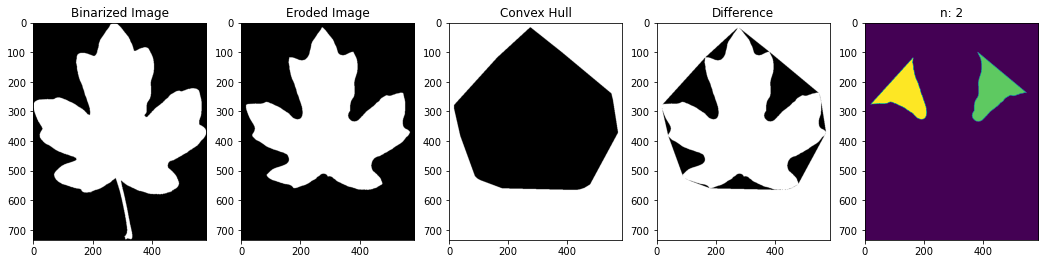

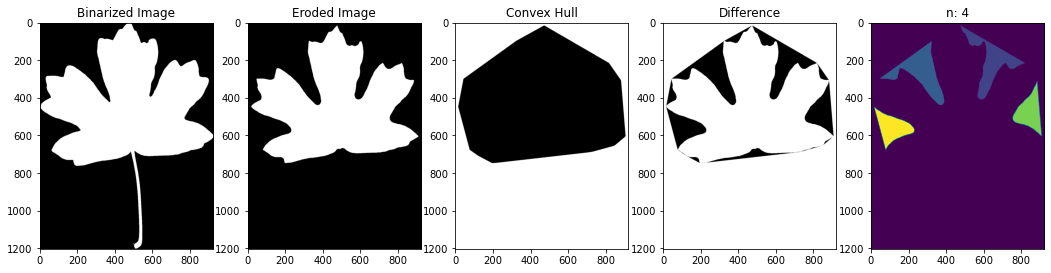

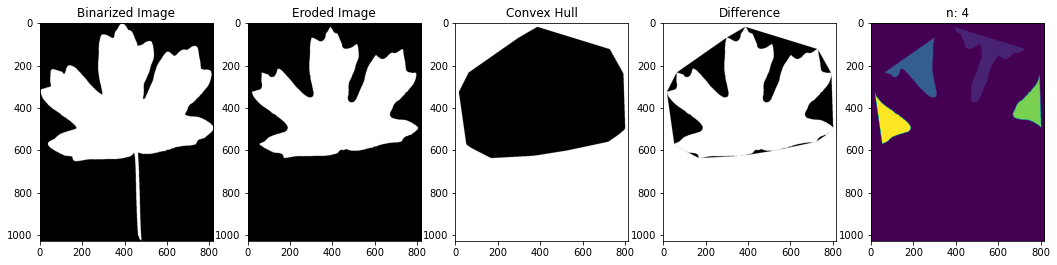

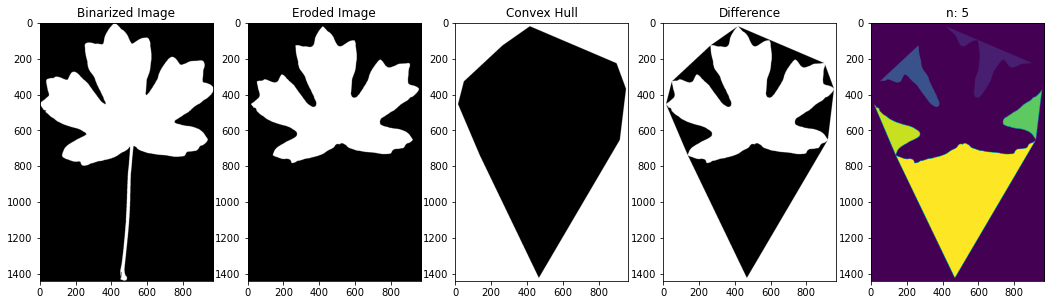

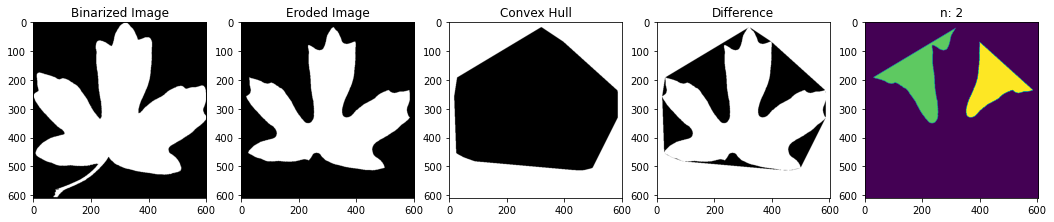

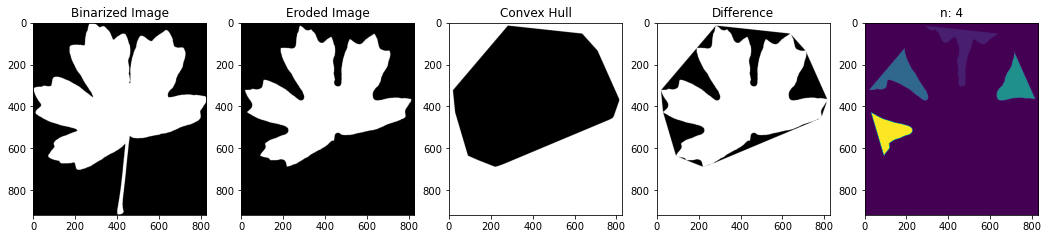

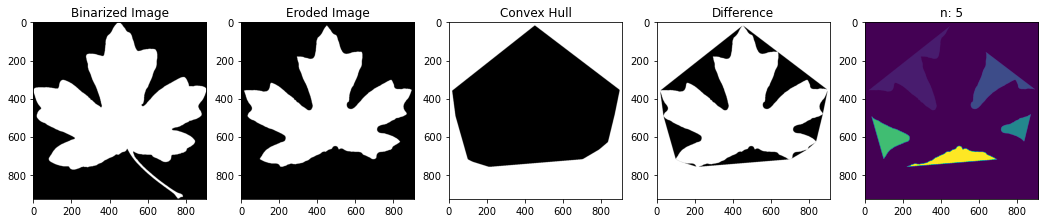

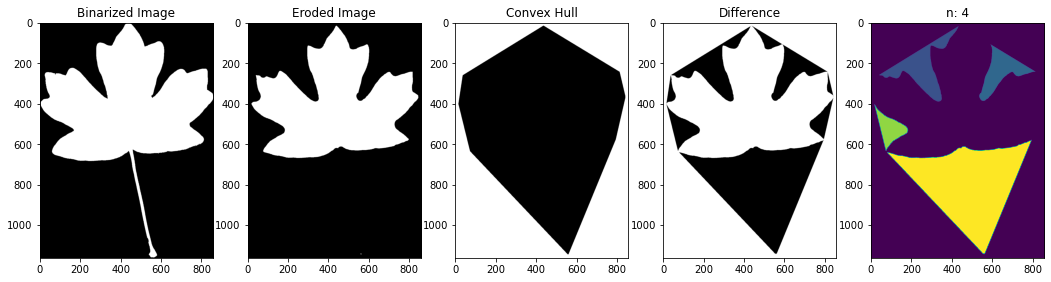

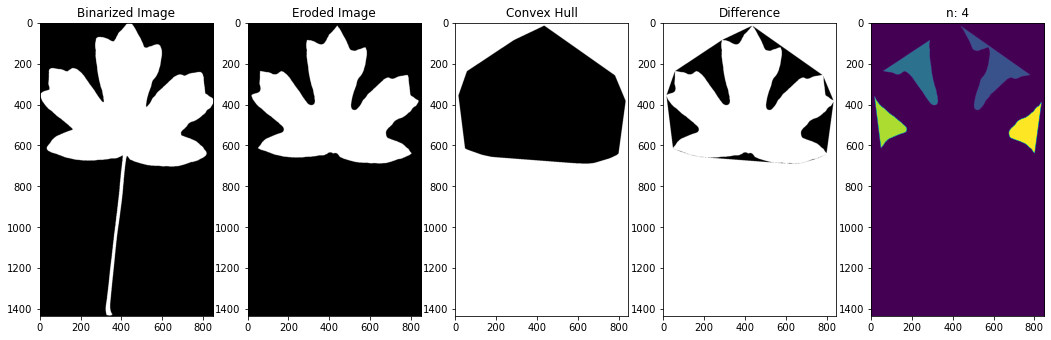

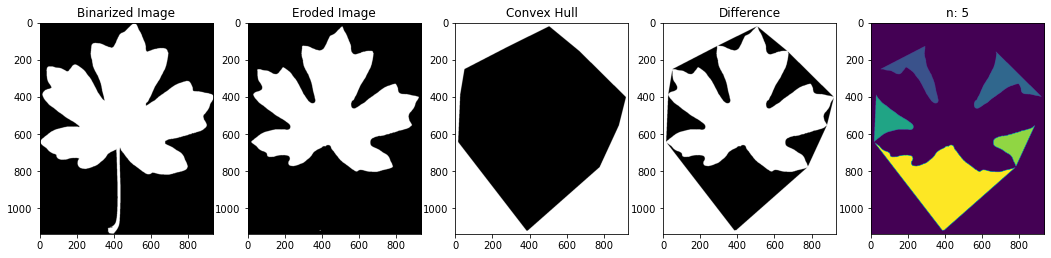

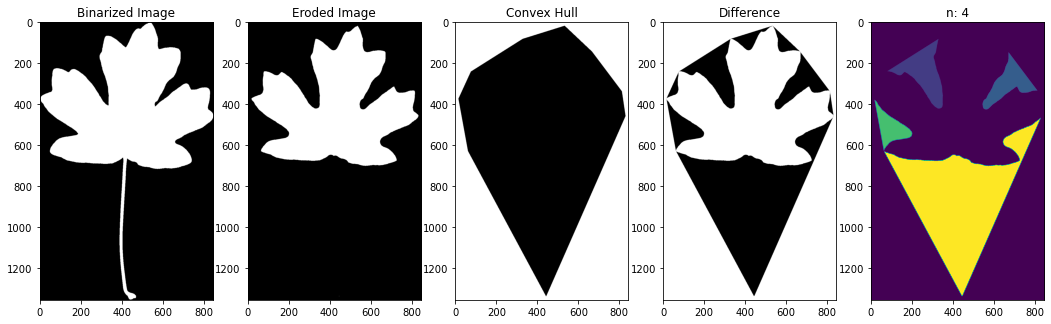

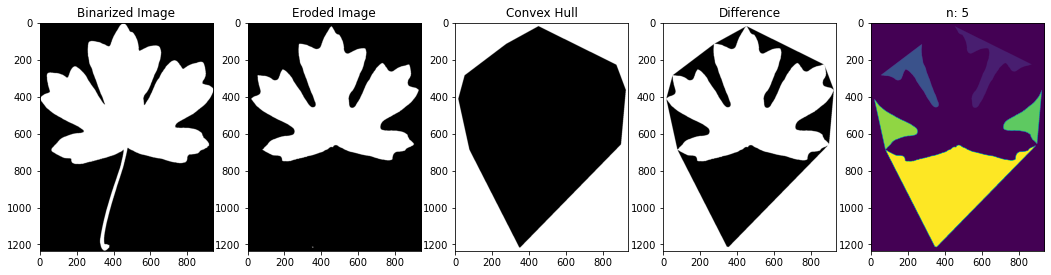

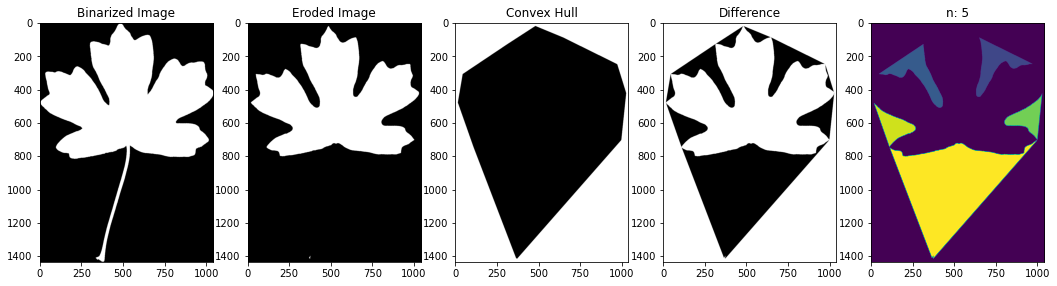

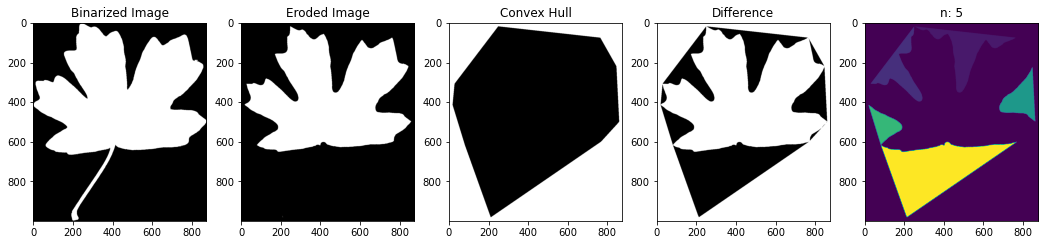

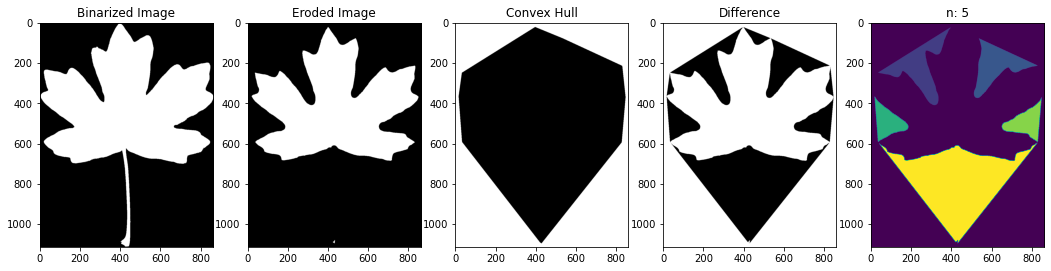

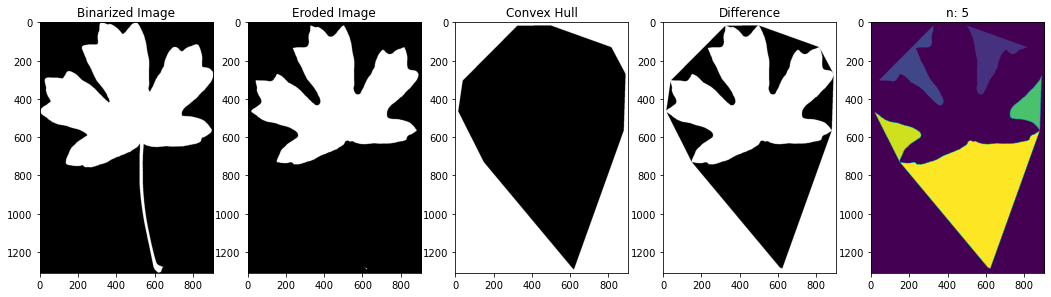

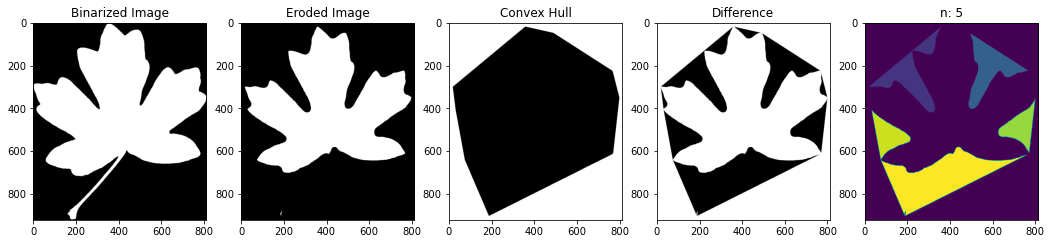

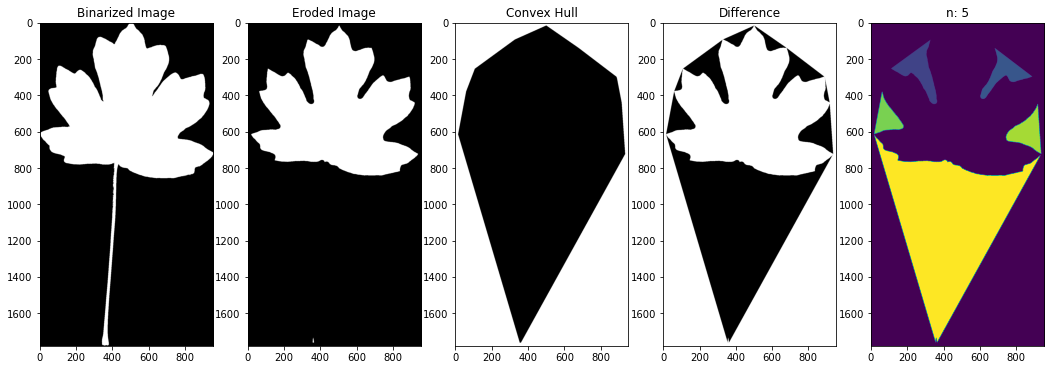

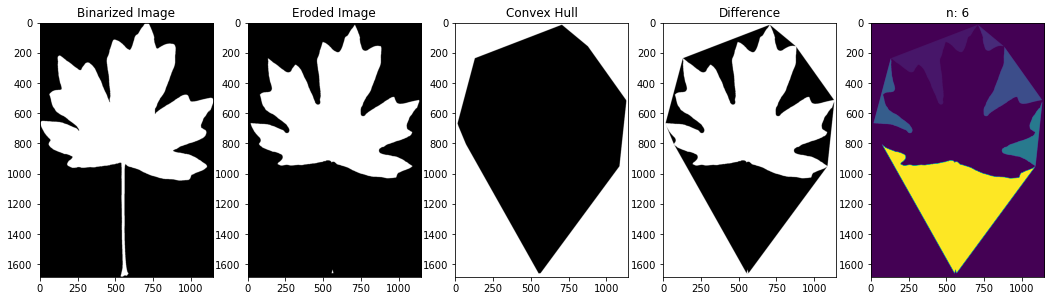

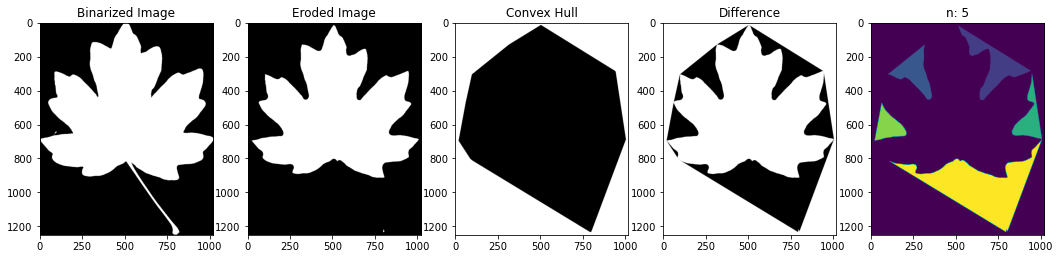

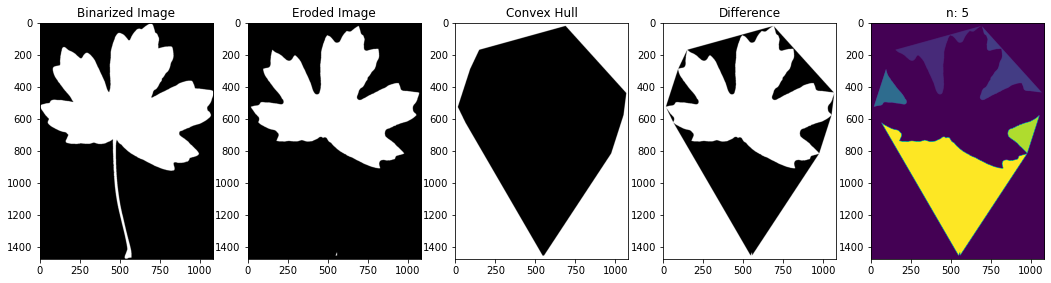

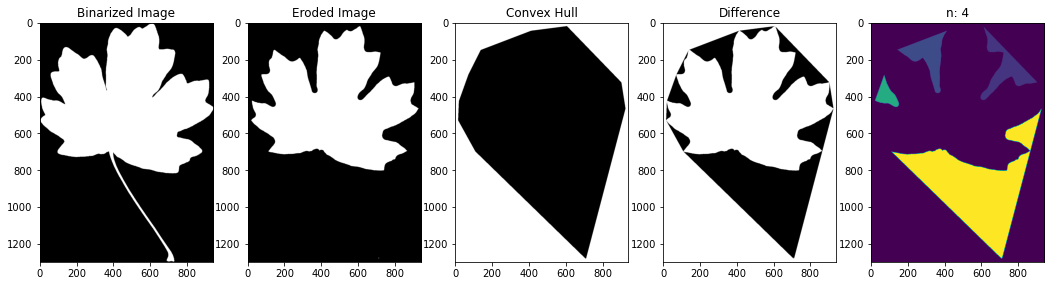

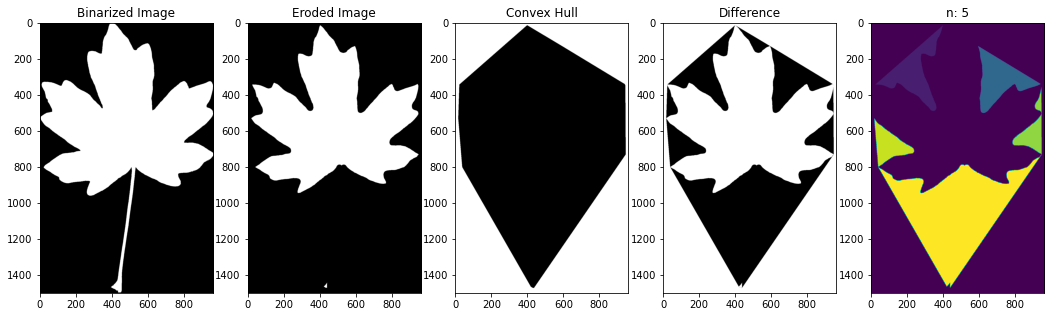

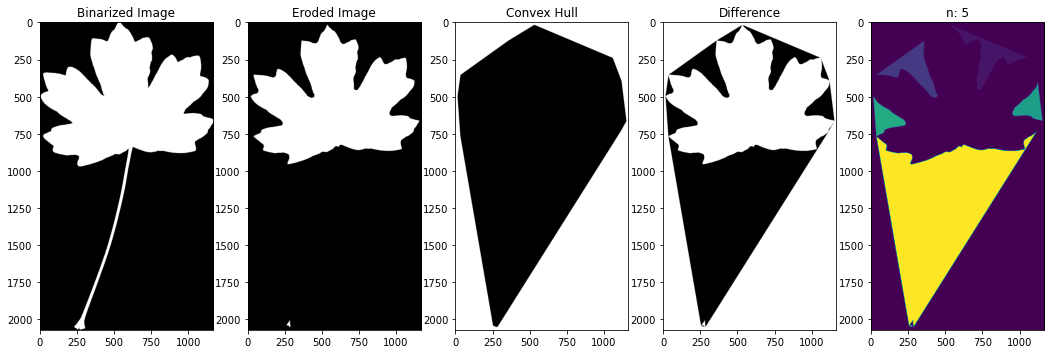

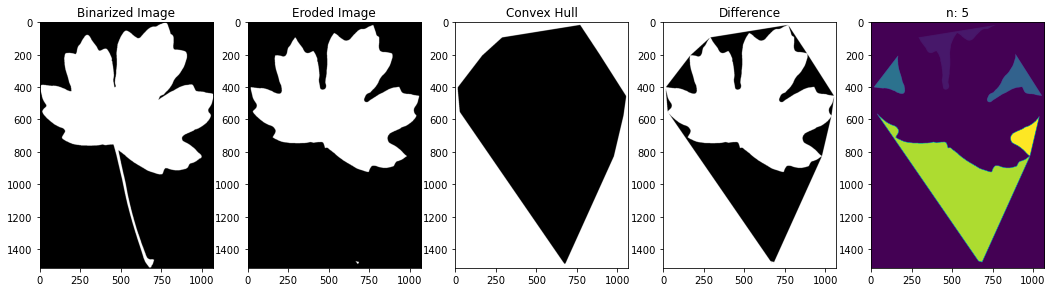

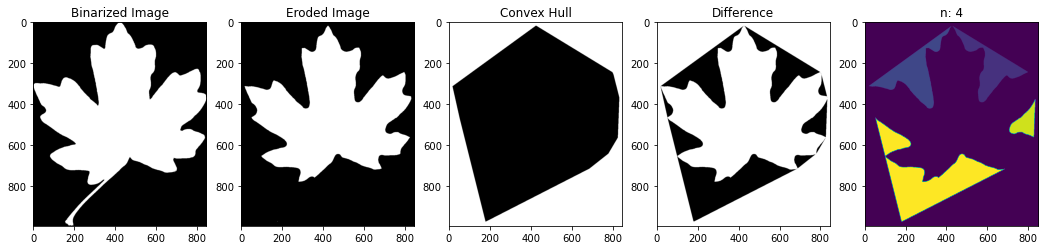

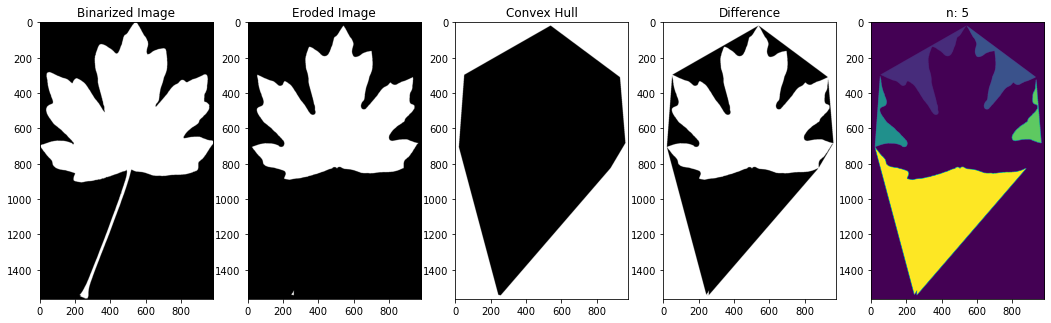

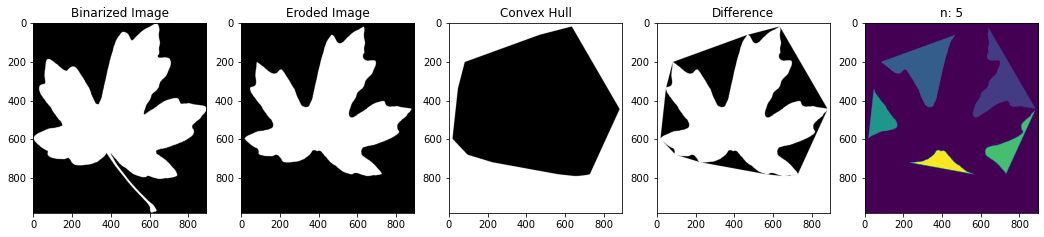

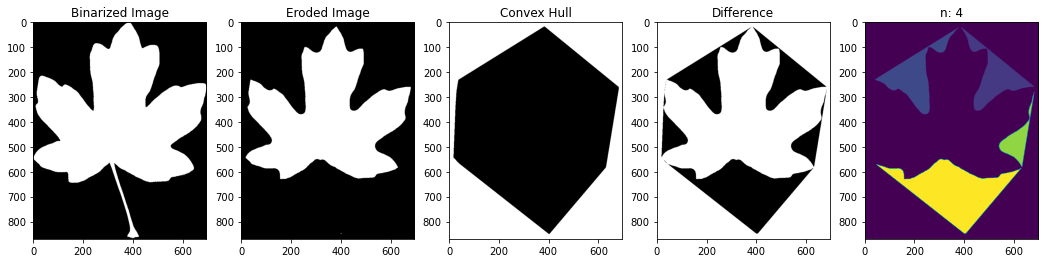

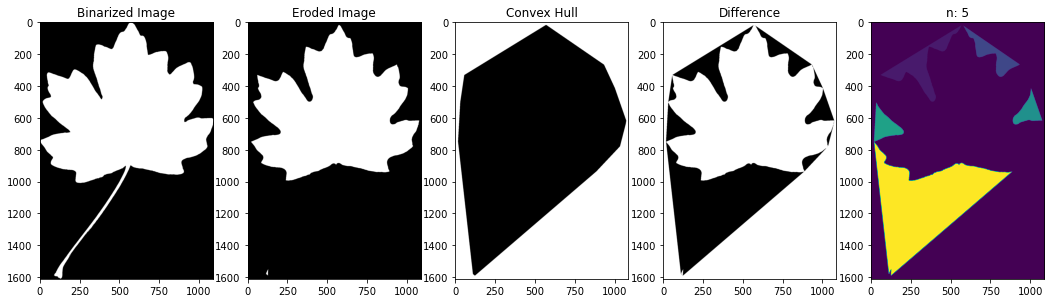

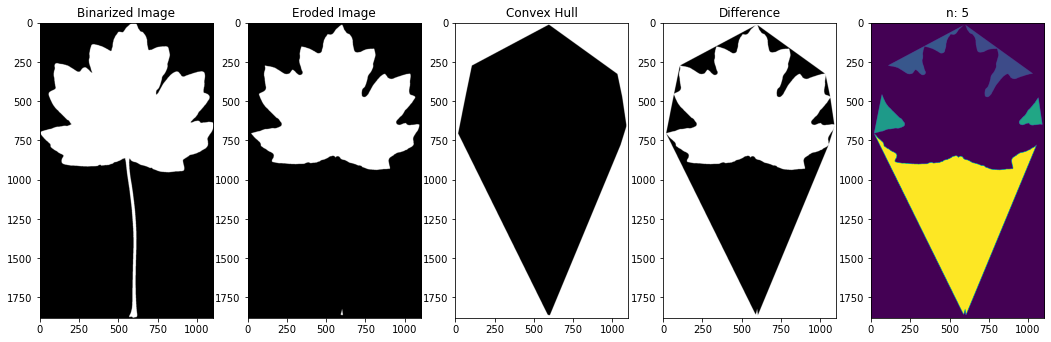

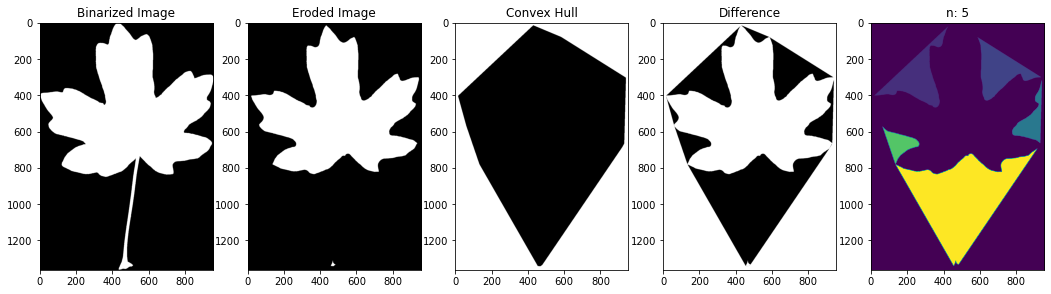

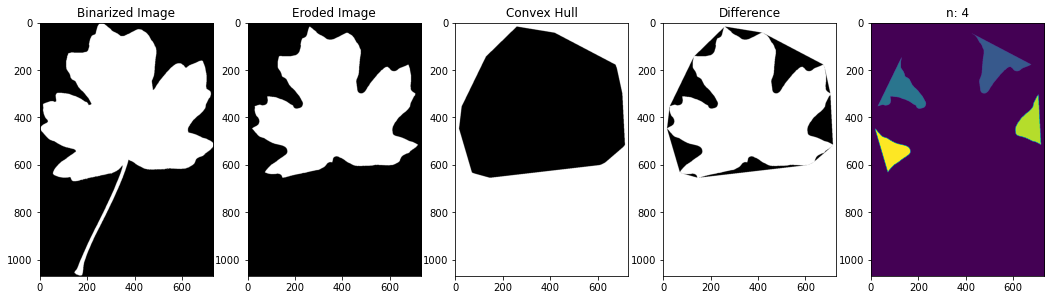

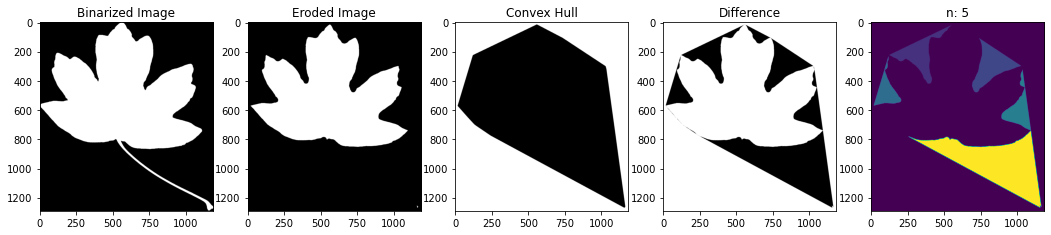

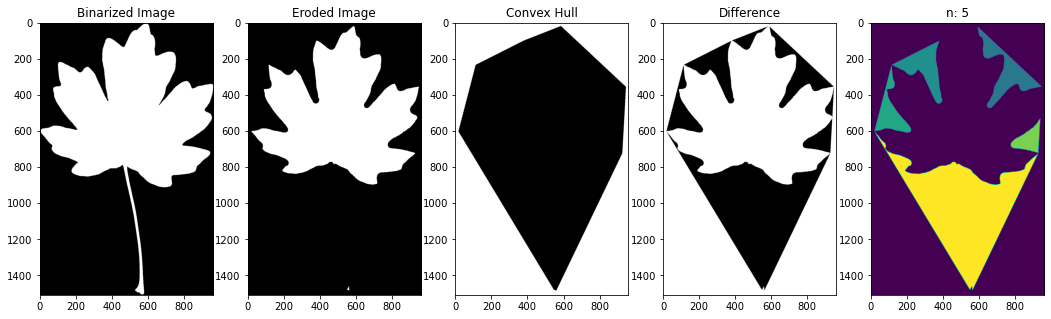

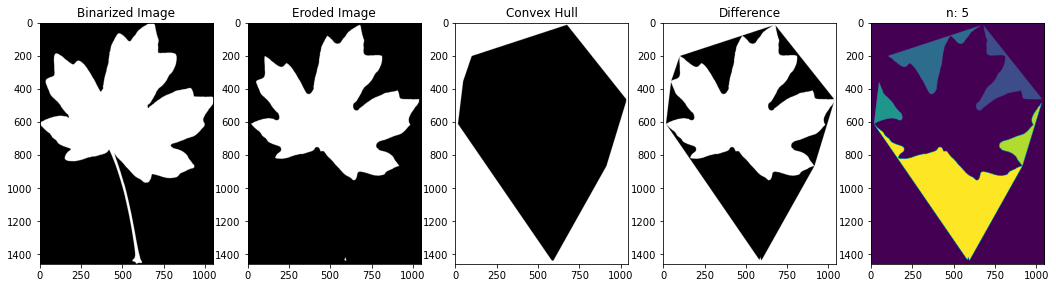

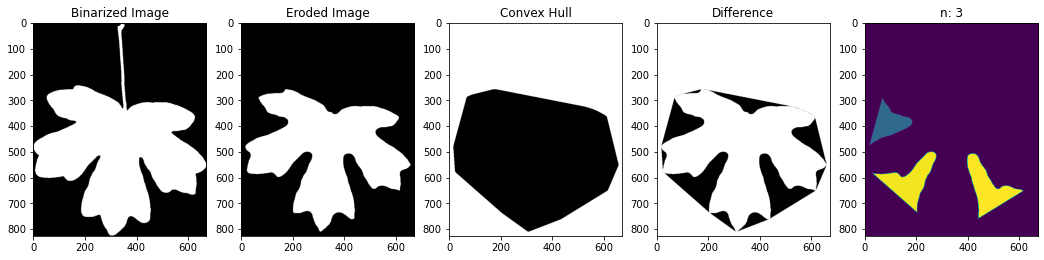

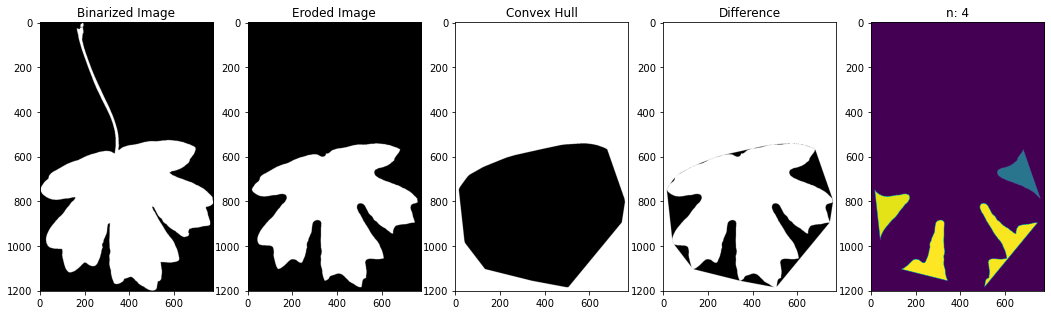

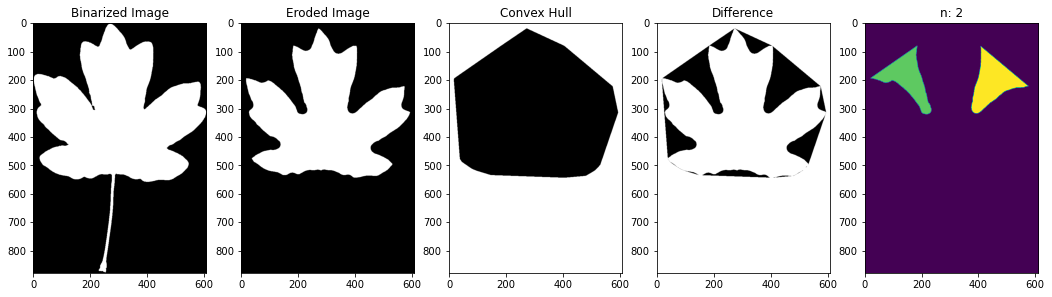

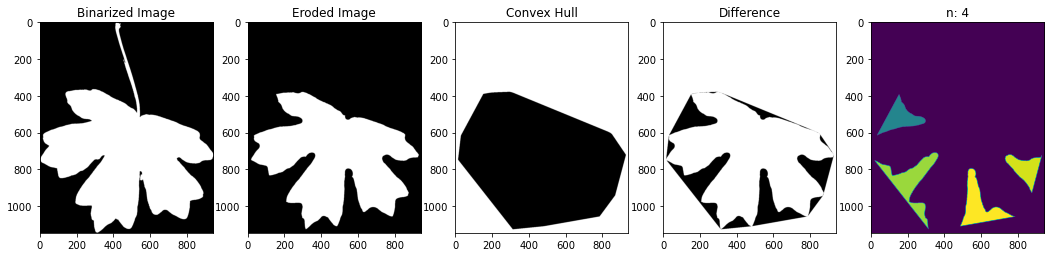

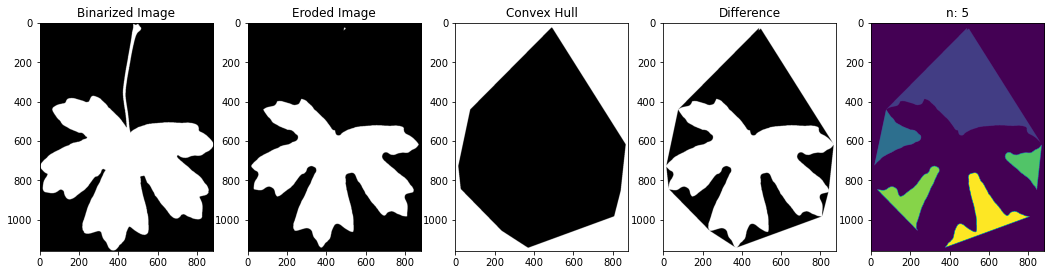

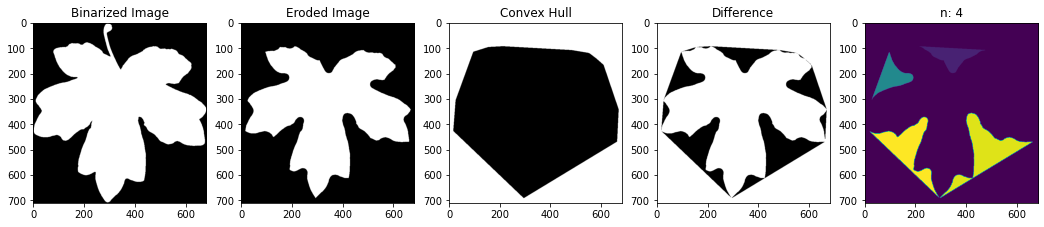

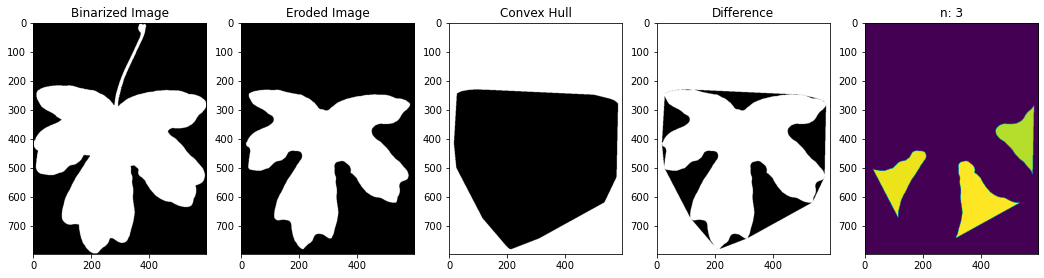

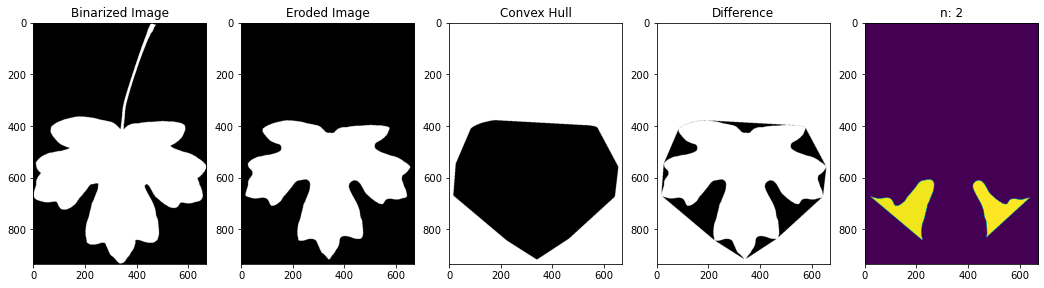

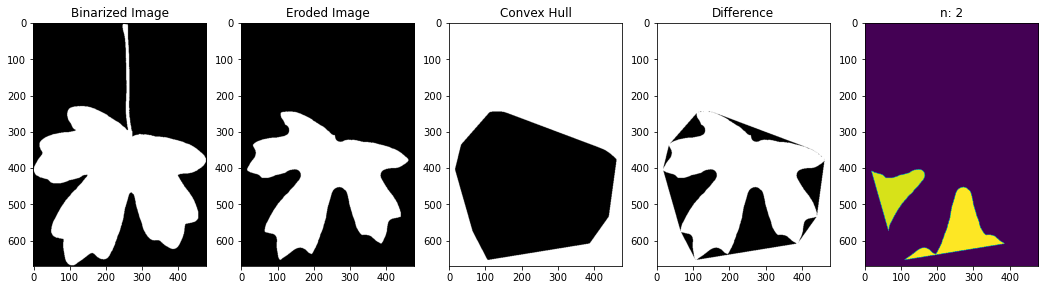

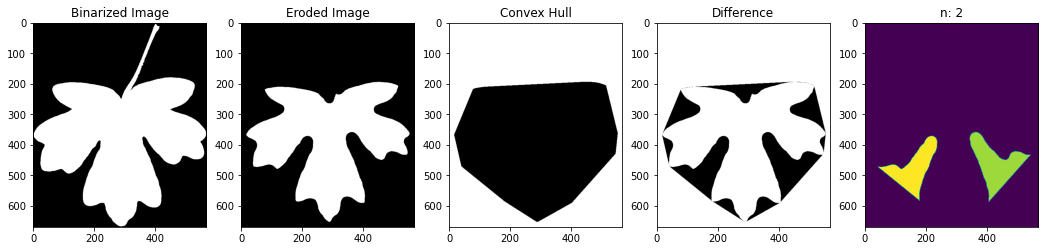

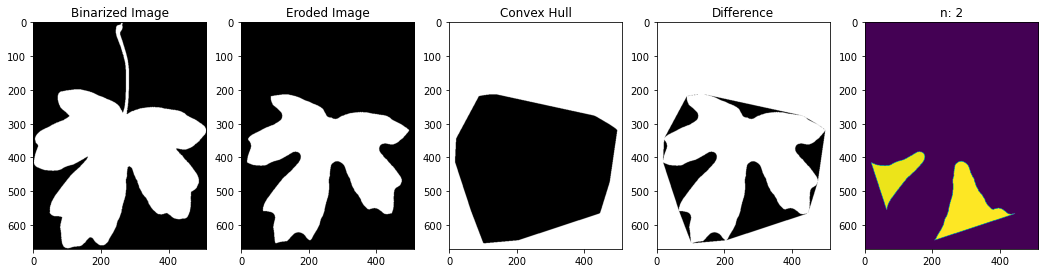

In [14]:
l = []

for image in images:
    length = count_blunts(image)
    
    l.append(length)


Text(0.5, 1.0, 'Results')

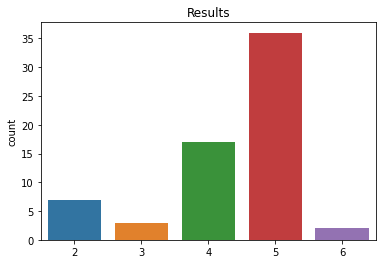

In [25]:
import seaborn as sns

sns.countplot(x = l)
plt.title("Results")